In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [66]:
df = pd.read_csv("../Data/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
#Checking if there is any null values
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [68]:
df.drop("customerID",axis=1,inplace = True)

[Replace values](https://datatofish.com/replace-values-pandas-dataframe/)

In [69]:
# (['1st old value','2nd old value',...],['1st new value','2nd new value',...])
df.replace(['Female','Male'],[0,1],inplace = True)
df.replace(['No internet service','No phone service'],'No',inplace = True)
df.replace(['DSL','Fiber optic'],'Yes',inplace = True)
df.replace(['No','Yes'],[0,1],inplace = True)

In [70]:
def print_unique(df):
    for col in df:
        print(col,":" ,df[col].unique())
    

- To explore more on coeerce error : <br>
[Coerce error](https://stackoverflow.com/questions/57286501/why-pd-to-numeric-errors-is-equivalent-to-errors-coerce)

In [71]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors ='coerce')

In [72]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [73]:
print_unique(df)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : [1 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [75]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


[Working with null value](https://datatofish.com/rows-with-nan-pandas-dataframe/)

In [77]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,0,1,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,1,0,0,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0
936,0,0,1,1,0,1,0,1,1,1,1,0,1,1,Two year,0,Mailed check,80.85,NaN,0
1082,1,0,1,1,0,1,1,0,0,0,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0
1340,0,0,1,1,0,0,0,1,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,0
3331,1,0,1,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,19.85,NaN,0
3826,1,0,1,1,0,1,1,0,0,0,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0
4380,0,0,1,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0
5218,1,0,1,1,0,1,0,0,0,0,0,0,0,0,One year,1,Mailed check,19.70,NaN,0
6670,0,0,1,1,0,1,1,1,0,1,1,1,1,0,Two year,0,Mailed check,73.35,NaN,0


In [78]:
df.fillna(value = df['TotalCharges'].mean(),inplace = True)

In [80]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [83]:
df = pd.get_dummies(data = df,columns =['Contract','PaymentMethod'])

In [84]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


Now we are ready for training and testing and the model development


In [86]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year              

In [92]:
#Scaling is required
cols_to_scale =['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [94]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,1,0,1,...,0.115423,0.001275,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,1,0,...,0.385075,0.215867,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,1,...,0.354229,0.010310,1,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,1,0,...,0.239303,0.210241,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,1,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,1,0,...,0.662189,0.227521,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,1,0,1,...,0.845274,0.847461,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.152778,0,0,1,1,0,...,0.112935,0.037809,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.055556,1,1,1,0,0,...,0.558706,0.033210,1,1,0,0,0,0,0,1


In [97]:
X = df.drop('Churn',axis =1)
y =df['Churn']

In [99]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,1,0,1,...,1,0.115423,0.001275,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,1,0,...,0,0.385075,0.215867,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,1,...,1,0.354229,0.010310,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,1,0,...,0,0.239303,0.210241,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,1,0,0,...,1,0.521891,0.015330,1,0,0,0,0,1,0


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape,y_train

((5634, 24),
 530     0
 5001    1
 2449    0
 3738    0
 1845    0
        ..
 4607    0
 1671    0
 6468    0
 1061    0
 4813    0
 Name: Churn, Length: 5634, dtype: int64)

In [113]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(Dense(24, input_shape = (24,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))



In [115]:
model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [118]:
model.fit(X_train,y_train,validation_data = (X_test , y_test) ,epochs=100)

Epoch 1/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8264 - val_loss: 0.4721 - val_accuracy: 0.7864
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8245 - val_loss: 0.4695 - val_accuracy: 0.7928
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8277 - val_loss: 0.4732 - val_accuracy: 0.7913
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8298 - val_loss: 0.4775 - val_accuracy: 0.7779
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8284 - val_loss: 0.4743 - val_accuracy: 0.7899
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8301 - val_loss: 0.4741 - val_accuracy: 0.7899
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8310 - val_loss: 0.4772 - val_accuracy: 0.7892

Epoch 58/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8374 - val_loss: 0.4971 - val_accuracy: 0.7786
Epoch 59/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8326 - val_loss: 0.5002 - val_accuracy: 0.7871
Epoch 60/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8397 - val_loss: 0.5016 - val_accuracy: 0.7779
Epoch 61/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8326 - val_loss: 0.4994 - val_accuracy: 0.7842
Epoch 62/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8351 - val_loss: 0.4945 - val_accuracy: 0.7821
Epoch 63/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8342 - val_loss: 0.5033 - val_accuracy: 0.7828
Epoch 64/100
177/177 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8397 - val_loss: 0.5052 - val_accuracy:

In [121]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

45/45 [==============================] - 0s 773us/step


In [122]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1014
           1       0.66      0.47      0.55       395

    accuracy                           0.78      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Text(95.72222222222221, 0.5, 'Truth')

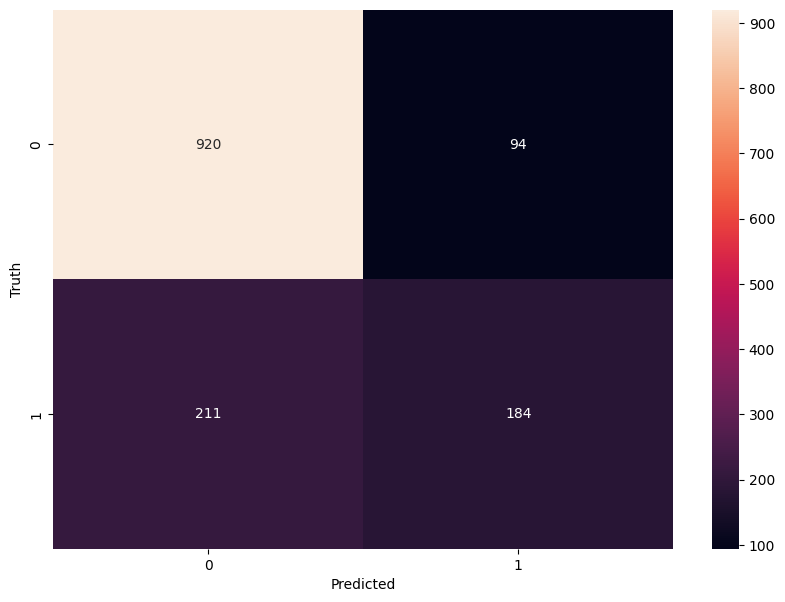

In [125]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')